#### **Overview** ####
In this exercise you are going to use a simple computer program for simulating the growth of a population. The simulation will be based on an exponential growth model and will involve organisms having one of two different genotypes ('A' and 'a'). By performing the simulation with a range of different model parameter values you will sharpen your intuitive understanding of the dynamics of the model.

You will also get a brief introduction to assessing how well a model describes some observed data (the "fit" of a model), and learn how model parameters can be estimated from such data (the process known as "model fitting").


In the command below: Instead of **/path/to/molevol** enter the path to the directory where you have placed your course files (for instance **cd /Users/bob/Documents/molevol, or cd /home/student/molevol**).



In [6]:
#bash
# 2. Copy required files:
# cd ../
# pwd
cp ../data/growth.py ./growth.py
cp ../data/modelfit.data ./modelfit.data
ls -l


total 24
-rwxr-xr-x 1 asus asus 1268 Jan 11 00:04  growth.py
-rw-r--r-- 1 asus asus   91 Jan 11 00:04  modelfit.data
-rw-rw-r-- 1 asus asus 1540 Jan  9 16:18  poptest
-rw-rw-r-- 1 asus asus 2670 Jan 11 00:04  Population_Growth_Fitness_and_Selection.ipynb
-rw-rw-r-- 1 asus asus 1540 Jan 10 09:46  res.1
-rw-rw-r-- 1 asus asus  955 Jan 10 09:53 ' total_population_size.R'


##### **Exploration of models of Population Growth, Fitness, and Selection** #####

In [7]:
gedit growth.py &

[1] 188965


Question:

what are the initial values of the parameters N0 (initial population size), fA (initial frequency of 'A'), rate_A (growth rate, or fitness, of 'A'), and rate_a (growth rate of 'a')

In [9]:
./growth.py > poptest

Question: 

what is the total population size (N) at generation 0 and generation 20? (Close the nedit window when you're done.)

The 'tidyverse' is "a set of packages that work in harmony because they share common data representations and user interface.


In [9]:
# R
# Now, read data from the file you just created, select variables, and reshape it for plotting: In RStudio type the following:
library(tidyverse)


df = read_table("poptest")
df2 = df %>% select(t, N, N_A, N_a) 
df3 = df2 %>% pivot_longer(cols = -c("t"))

head(df)


── Column specification ────────────────────────────────────────────────────────
cols(
  t = col_double(),
  N = col_double(),
  N_A = col_double(),
  N_a = col_double(),
  fA = col_double(),
  fa = col_double()
)



t,N,N_A,N_a,fA,fa
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1000,300,700,0.3,0.7
1,1200,360,840,0.3,0.7
2,1440,432,1008,0.3,0.7
3,1728,518,1209,0.3,0.7
4,2073,622,1451,0.3,0.7
5,2488,746,1741,0.3,0.7


In [10]:
head(df2)

t,N,N_A,N_a
<dbl>,<dbl>,<dbl>,<dbl>
0,1000,300,700
1,1200,360,840
2,1440,432,1008
3,1728,518,1209
4,2073,622,1451
5,2488,746,1741


In [11]:
head(df3)

t,name,value
<dbl>,<chr>,<dbl>
0,N,1000
0,N_A,300
0,N_a,700
1,N,1200
1,N_A,360
1,N_a,840


The ggplot command plots the population data as a function of time, with automatic legend and coloration based on variable (N, N_A, and N_a). Specifically, we here plot total population size ("N"), the number of organisms with allele 'A' ("NA"), and the number of organisms with allele 'a' ("Na") for each generation. Recall that in this run the two alleles had the same fitness (rate_A = rate_a = 1.2) but different initial population sizes (fA = 0.3, fa = 0.7).

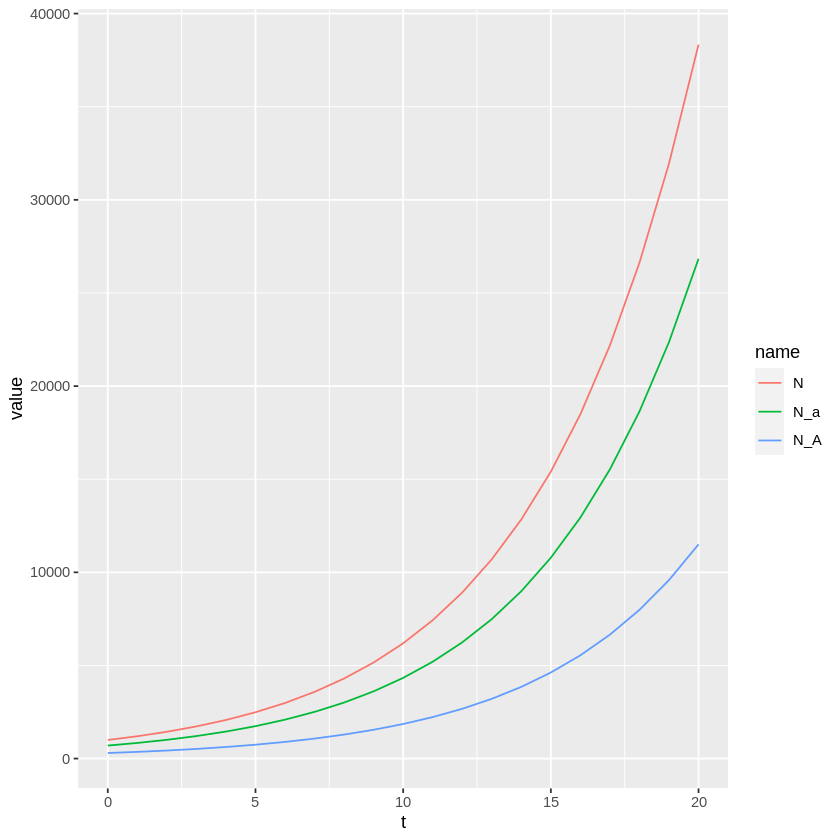

In [12]:
# plot the population sizes:

ggplot(df3, aes(x=t, y=value, color=name)) + geom_line()

Here we have plotted the frequencies of the two alleles for each simulated generation. Note how we here combined the select and pivot_longer commands into one by using the pipe.

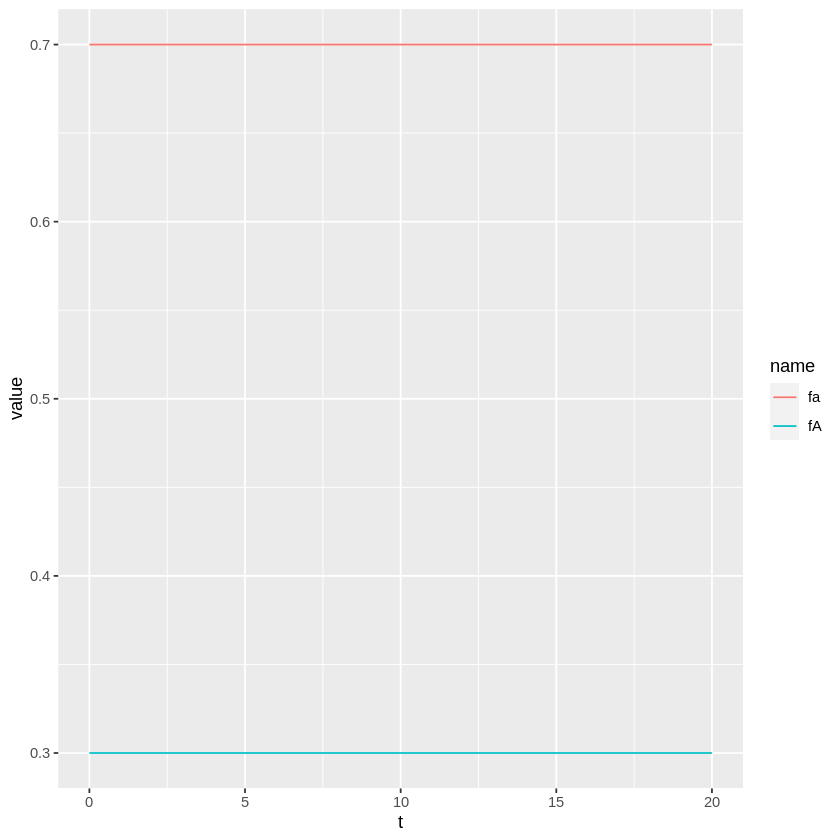

In [13]:
# Now plot the allele frequencies: In RStudio type the following:

df4 =  df %>% select(t, fA, fa) %>% pivot_longer(cols = -c("t"))
ggplot(df4, aes(x=t, y=value, color=name)) + geom_line()


Question: How do the frequencies of the two alleles (fA and fa) behave for this case where the two alleles have the same fitness?

Question 4:

Simulation number 1: In the terminal window where you are not running RStudio: Using what you learned above, run the simulation program for the parameter values listed below, and save the output to a file named "res.1" (without the quotes).

You should use nedit to alter the relevant parameter values in the growth.py file. Remember to save growth.py after making the alterations (File -> Save).

N0 = 50     rate_A = 1.2  rate_a = 1.2  fA = 0.3


Question: What is the relative fitness of allele 'a' (using 'A' as a reference):

Question 5:

Based on the file "res.1" you just created above, plot the population sizes: In RStudio, type the following:



── Column specification ────────────────────────────────────────────────────────
cols(
  t = col_double(),
  N = col_double(),
  N_A = col_double(),
  N_a = col_double(),
  fA = col_double(),
  fa = col_double()
)



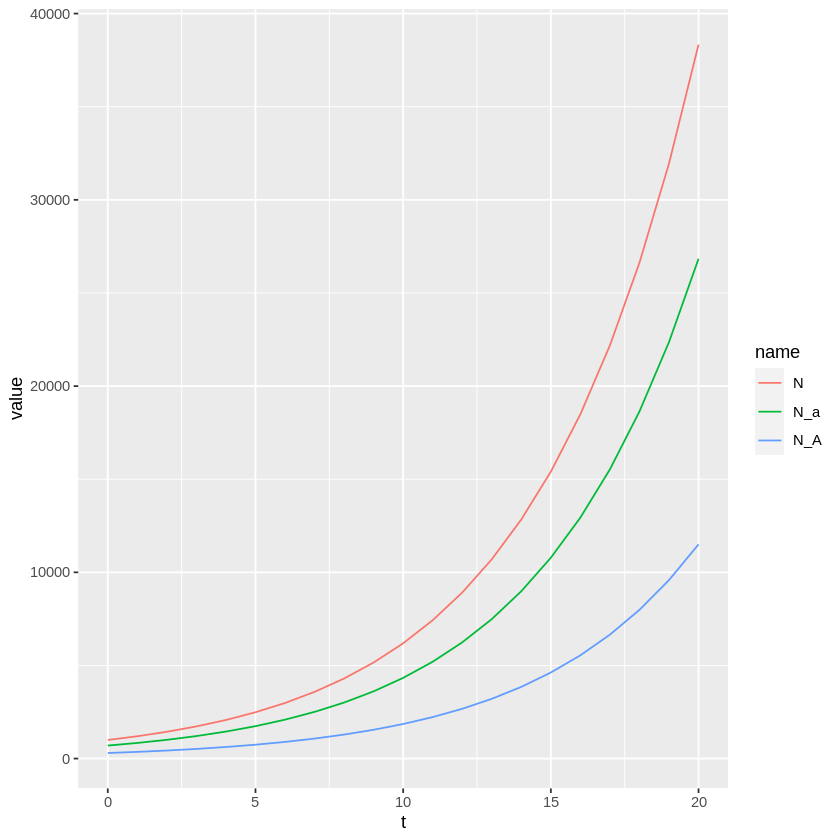

In [14]:
df = read_table("res.1")
df2 =  df %>% select(t, N, N_A, N_a) %>% pivot_longer(cols = -c("t"))
ggplot(df2, aes(x=t, y=value, color=name)) + geom_line()

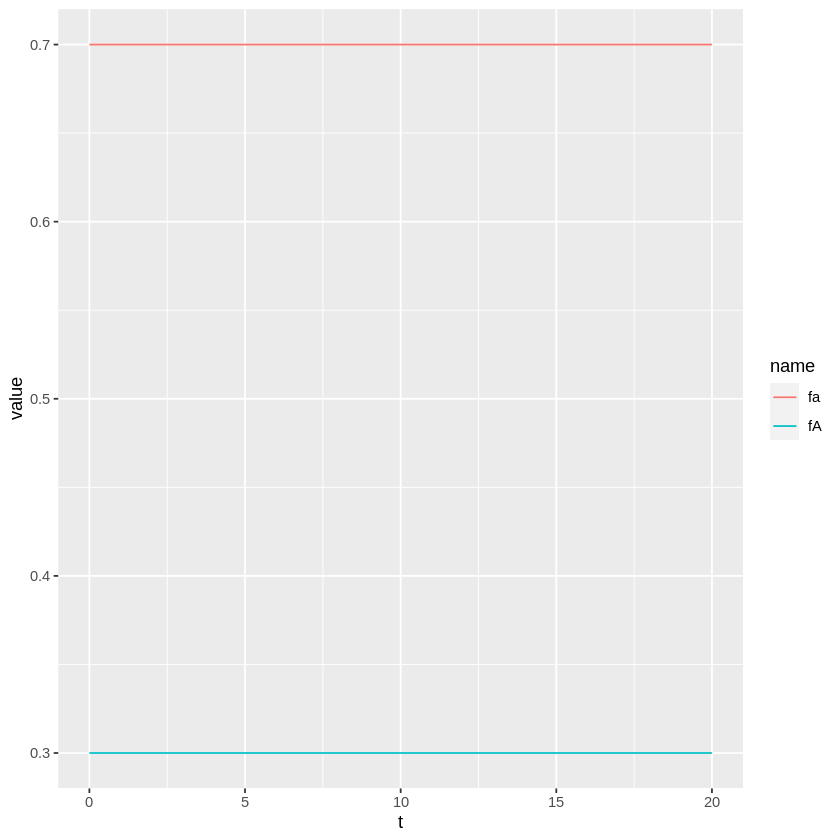

In [16]:
# Now plot allele frequencies:

df3 =  df %>% select(t, fA, fa) %>% pivot_longer(cols = -c("t"))
ggplot(df3, aes(x=t, y=value, color=name)) + geom_line()

Model Fit, Parameter Estimation
In this part of the exercise, we will briefly consider some aspects of the fit between models and reality.


In [17]:
dat = read_table("modelfit.data")
print(dat)


── Column specification ────────────────────────────────────────────────────────
cols(
  t = col_double(),
  N = col_double()
)



# A tibble: 8 × 2
      t     N
  <dbl> <dbl>
1     0   233
2     2  1205
3     4  1100
4     6  2091
5     8  3010
6    10  6156
7    12  7323
8    14 11825


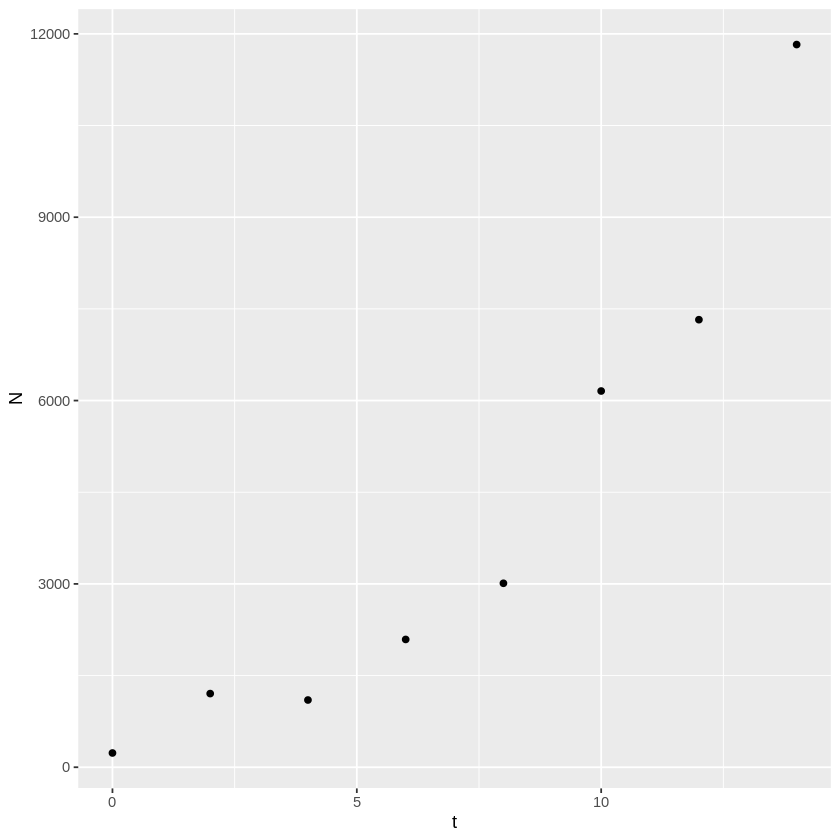

In [18]:
# Plot data points:

ggplot(dat, aes(x=t, y=N)) + geom_point()

Select first 7 data points for model fitting:

We will use the first 7 data points for fitting models, while leaving out the 8th data point to test how well our fitted models generalise. (This is a very minimal version of a technique called "out of sample testing").


In [19]:
train = dat %>% filter(t<14)
print(train)

# A tibble: 7 × 2
      t     N
  <dbl> <dbl>
1     0   233
2     2  1205
3     4  1100
4     6  2091
5     8  3010
6    10  6156
7    12  7323


Estimating parameters of exponential growth model from data:

We will now assume that the population is growing exponentially according to this model:

Nt=N0exp(r×t)
where N0
 is the initial population size, r
 is the instantaneous rate of increase, and t
 is the generation number. Our model thus has two "free parameters: N0
 and r
. You will now attempt to find a "good" set of values for these parameters. We will take "good" values to be those that cause the theoretical curve to lie as close as possible to the observed data. This process is called model-fitting.

There are actually several different ways of defining "as close as possible". One measure that turns out to be convenient is the "sum of squared residuals" (SSR; the word "error" is sometimes used instead of "residual"). The approach is the following: for each x,y point in the data set, the difference between the observed y and the y-value predicted by the model is computed. This difference (the "error" or "residual") is then squared, and the sum of all the squared residual terms is then taken to be an indication of how well the model fits the data. The best fitting model thus has the smallest possible SSR, and this approach is therefore referred to as "least squares model fitting". Another measure of model fit that we will return to later in the course is the model likelihood.

Find a good set of initial parameter values:

We will use the nls function ("Non-linear Least Squares") in R to fit our models. This function takes as input a formula (the model) and some data, and returns estimates of the free model parameters, along with summaries of model fit. The function also requires a set of "start values" - guesses at approximate values for the free parameters in the model - to run. These do not need to be very close to the final result, they should just help by placing the numerical model fitting algorithm in a reasonable neighbourhood in parameter space.

In the R commands below, replace "???" by your guess about reasonable parameter values, and then check how well they fit by plotting the data points along with the line corresponding to your initial values. You will probably need to repeat this step a few times until you are in the vicinity of the correct values (but dont overdo it - the nls function should do most of the work). Note: It will make it simpler to repeat these commands if you place them in a small R script (click the plus icon in the upper left corner of RStudio and select "R Script"):

